In [85]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

Importing Data

In [86]:
df = pd.read_csv('./survey lung cancer.csv')
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


EDA

1. Basic data inspection

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

A total of 16 cols with no missing data.

In [88]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


All numericsl cols are categorical expect Age

In [89]:
df[['GENDER','LUNG_CANCER']].head()

,GENDER,LUNG_CANCER
0,M,YES
1,M,YES
2,F,NO
3,M,NO
4,F,NO


Both non numerical cols are also categorical

In [90]:
df.duplicated().sum()

33

In [91]:
df.drop_duplicates(inplace=True)

2. Visualization

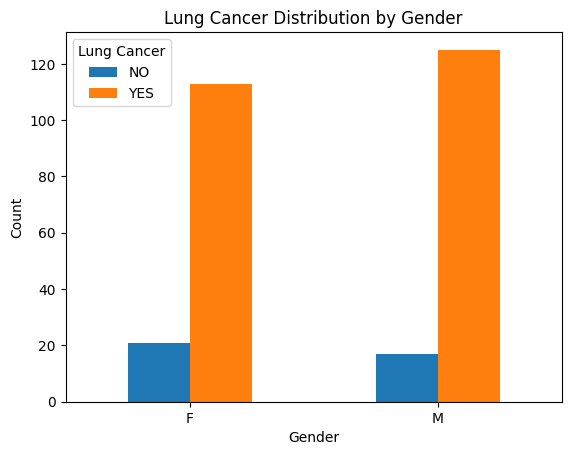

In [92]:
grouped_data = df.groupby(['GENDER', 'LUNG_CANCER']).size().unstack()
grouped_data.plot(kind='bar')
plt.title('Lung Cancer Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Lung Cancer')
plt.show()

The Chart Clearly shows a major class imbalance that needs to be handled as well as labelecoding on both the gender and lung cancer cols

3. preprocessing

In [93]:
df['GENDER'] = df['GENDER'].map({'M':2, 'F': 1 })
df['GENDER'].head()

0    2
1    2
2    1
3    2
4    1
Name: GENDER, dtype: int64

In [94]:
df['LUNG_CANCER'] = df['LUNG_CANCER'].map({"YES":2,"NO":1})
df['LUNG_CANCER'].head()

0    2
1    2
2    1
3    1
4    1
Name: LUNG_CANCER, dtype: int64

In [95]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['age_scaled'] = scaler.fit_transform(df[['AGE']])

In [96]:
df['age_scaled'].describe()

count    2.760000e+02
mean     2.316987e-16
std      1.001817e+00
min     -5.010595e+00
25%     -6.168485e-01
50%     -4.894936e-02
75%      7.281758e-01
max      2.880215e+00
Name: age_scaled, dtype: float64

4. Feautre selection and engineering

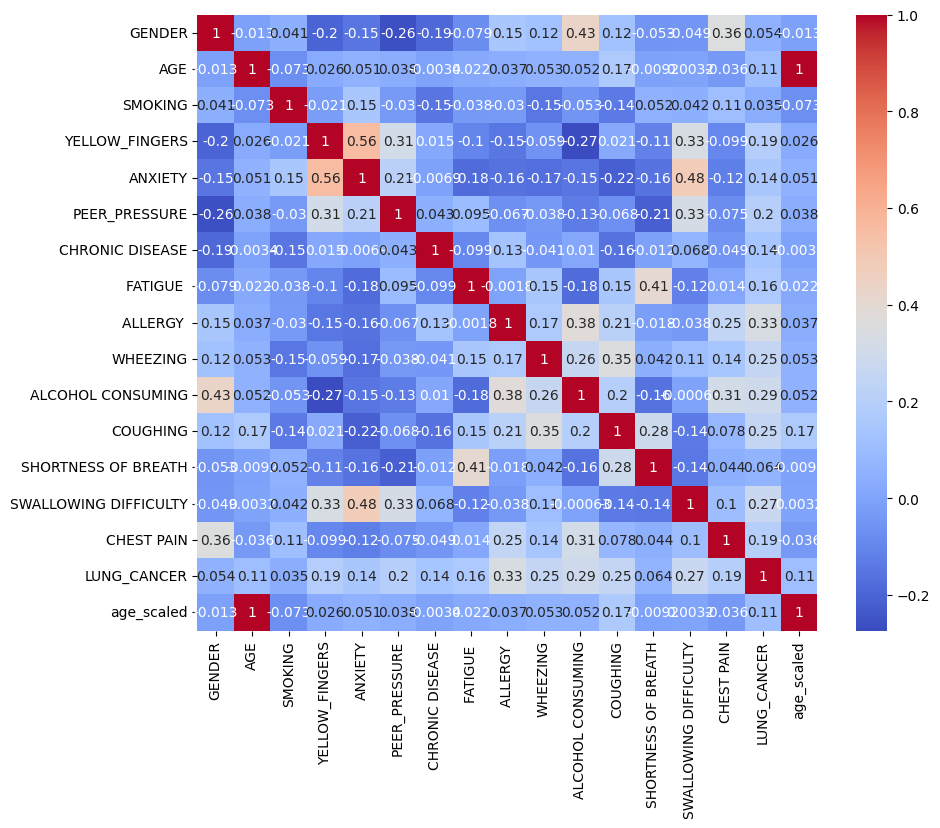

In [97]:
import seaborn as sns

corr_matrix = df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [98]:
df.drop(columns=['AGE'], inplace=True)

In [99]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['LUNG_CANCER'])
y = df['LUNG_CANCER']
X_train, X_test, y_train,y_test =train_test_split(X , y, test_size=0.2, random_state=42, stratify=y)

In [100]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
importances = pd.Series(model.feature_importances_, index=X_train.columns)
print(importances.sort_values(ascending=False))


age_scaled               0.215582
ALLERGY                  0.085323
PEER_PRESSURE            0.074046
CHRONIC DISEASE          0.071653
ALCOHOL CONSUMING        0.069362
FATIGUE                  0.062265
YELLOW_FINGERS           0.056876
SHORTNESS OF BREATH      0.054092
SWALLOWING DIFFICULTY    0.051893
CHEST PAIN               0.050282
SMOKING                  0.044600
ANXIETY                  0.044454
GENDER                   0.040814
WHEEZING                 0.039440
COUGHING                 0.039318
dtype: float64


In [102]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=7) 
X_rfe = rfe.fit_transform(X_train, y_train)

selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)


Selected Features: Index(['YELLOW_FINGERS', 'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ',
       'ALLERGY ', 'ALCOHOL CONSUMING', 'SWALLOWING DIFFICULTY'],
      dtype='object')


5. Modeling

In [115]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

models = {
    'SVC': SVC(),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier()
}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name} CV Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    


SVC CV Accuracy: 0.8818 ± 0.0170
Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.25      0.36         8
           2       0.89      0.98      0.93        48

    accuracy                           0.88        56
   macro avg       0.78      0.61      0.65        56
weighted avg       0.86      0.88      0.85        56

DecisionTree CV Accuracy: 0.8636 ± 0.0498
Classification Report:
              precision    recall  f1-score   support

           1       0.64      0.88      0.74         8
           2       0.98      0.92      0.95        48

    accuracy                           0.91        56
   macro avg       0.81      0.90      0.84        56
weighted avg       0.93      0.91      0.92        56

RandomForest CV Accuracy: 0.9000 ± 0.0340
Classification Report:
              precision    recall  f1-score   support

           1       0.71      0.62      0.67         8
           2       0.94      0.96      0.95        

Highest scoring Algo is Random Forest

6. Hyperparameter Tuning

In [117]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Score: 0.9045454545454545
Classification Report:
              precision    recall  f1-score   support

           1       0.75      0.75      0.75         8
           2       0.96      0.96      0.96        48

    accuracy                           0.93        56
   macro avg       0.85      0.85      0.85        56
weighted avg       0.93      0.93      0.93        56

Confusion Matrix:
[[ 6  2]
 [ 2 46]]
